In [1]:
import ast 
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df = df[df['job_title_short'] == 'Data Analyst'] 
df_explode = df.explode('job_skills')
df_explode = df_explode.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')                
)
df_explode = df_explode.sort_values(by='skill_count', ascending=False).head(20)

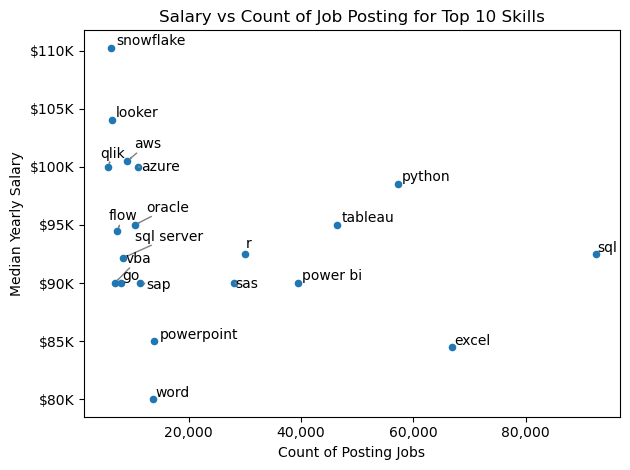

In [ ]:
from adjustText import adjust_text
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Your existing plot
df_explode.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []
for i, txt in enumerate(df_explode.index):
    texts.append(plt.text(df_explode['skill_count'].iloc[i],
                          df_explode['median_salary'].iloc[i],
                          txt))

ax = plt.gca()

# ✅ Format y-axis as "$XXK"
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

# ✅ Format x-axis with commas
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.xlabel('Count of Posting Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs Count of Job Posting for Top 10 Skills')
plt.tight_layout()
plt.show()


In [4]:
help(df.rename)

Help on method rename in module pandas.core.frame:

rename(
    mapper: 'Renamer | None' = None,
    *,
    index: 'Renamer | None' = None,
    columns: 'Renamer | None' = None,
    axis: 'Axis | None' = None,
    copy: 'bool | None' = None,
    inplace: 'bool' = False,
    level: 'Level | None' = None,
    errors: 'IgnoreRaise' = 'ignore'
) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Rename columns or index labels.

    Function / dict values must be unique (1-to-1). Labels not contained in
    a dict / Series will be left as-is. Extra labels listed don't throw an
    error.

    See the :ref:`user guide <basics.rename>` for more.

    Parameters
    ----------
    mapper : dict-like or function
        Dict-like or function transformations to apply to
        that axis' values. Use either ``mapper`` and ``axis`` to
        specify the axis to target with ``mapper``, or ``index`` and
        ``columns``.
    index : dict-like or function
        Alternativ